In [2]:
import sys
import getopt
import os
import fnmatch
import random
import numpy as np
import pandas as pd
import itertools
from datetime import *
from scipy import sparse
from random import sample
import glob

In [8]:
glob.glob("/home/yangqian/storage/Bio/HiC/单细胞Hi-C示例数据/matrix/hg19_PBMC_18cells/*.matrix")

[]

In [8]:
from scipy import sparse
# from numpy import array
I = np.array([0,2,1,0])
J = np.array([0,2,1,2])
V = np.array([4,5,7,9])
A = sparse.coo_array((V,(I,J)),shape=(4,4))
I = np.array([0,0,1,3,1,0,0])
J = np.array([0,2,1,3,1,0,0])
V = np.array([1,1,1,1,1,1,1])
B = sparse.coo_array((V,(I,J)),shape=(4,4))
C = A + B
print(A.toarray())
print(B.toarray())
print(C.toarray())
print(sum(A.toarray()),sum(B.toarray()),sum(C.toarray()))
print(A.col,A.row)

[[4 0 9 0]
 [0 7 0 0]
 [0 0 5 0]
 [0 0 0 0]]
[[3 0 1 0]
 [0 2 0 0]
 [0 0 0 0]
 [0 0 0 1]]
[[ 7  0 10  0]
 [ 0  9  0  0]
 [ 0  0  5  0]
 [ 0  0  0  1]]
[ 4  7 14  0] [3 2 1 1] [ 7  9 15  1]
[0 2 1 2] [0 2 1 0]


In [2]:
from HiSTra.hicInput import matrix2mat
from HiSTra.utils import sizes2bed,sizes2resUnit
dir_path_fmt = "/home/yangqian/storage/Bio/HiC/单细胞Hi-C示例数据/matrix/sample_name/"
sample_name = "hg19_PBMC_18cells"
dir_path = dir_path_fmt.replace("sample_name",sample_name)
sizes_path = "/home/yangqian/storage/Bio/projects/HiST/chrom_hg19.sizes"
sizes = pd.read_csv(sizes_path,sep='\t',header=None)
TLout_path = "/home/yangqian/storage/Bio/projects/HiST/test-scHiC-TLout/"
test_scHiC_matfromhic_path = matrix2mat(dir_path,TLout_path,sizes,"raw")
# res_unit = sizes2resUnit(sizes)
# bed_df_low, bed_df_high = sizes2bed(sizes,5*res_unit), sizes2bed(sizes,res_unit)
# size_low, size_high = len(bed_df_low), len(bed_df_high)
# size_low,size_high

The number of cells included: 18.
--------- The cells file path is /home/yangqian/storage/Bio/HiC/单细胞Hi-C示例数据/matrix/hg19_PBMC_18cells/. ---------
--------- The cells file path is /home/yangqian/storage/Bio/HiC/单细胞Hi-C示例数据/matrix/hg19_PBMC_18cells/. ---------
--------- We are dumpping hg19_PBMC_18cells sample chromosome pairs ('chr1', 'chr1').
--------- Process is completed 0.0%... ---------
--------- We are dumpping hg19_PBMC_18cells sample chromosome pairs ('chr2', 'chr2').
--------- Process is completed 8.333333333333334%... ---------
--------- We are dumpping hg19_PBMC_18cells sample chromosome pairs ('chr3', 'chr3').
--------- Process is completed 16.304347826086957%... ---------
--------- We are dumpping hg19_PBMC_18cells sample chromosome pairs ('chr4', 'chr4').
--------- Process is completed 23.91304347826087%... ---------
--------- We are dumpping hg19_PBMC_18cells sample chromosome pairs ('chr5', 'chr5').
--------- Process is completed 31.159420289855074%... ---------
-------

In [4]:
sum_mat_low, sum_mat_high

(<6207x6207 sparse matrix of type '<class 'numpy.float64'>'
 	with 2847625 stored elements in Compressed Sparse Row format>,
 <30971x30971 sparse matrix of type '<class 'numpy.float64'>'
 	with 6695846 stored elements in Compressed Sparse Row format>)

In [24]:
# dir_path = "/home/yangqian/下载/单细胞Hi-C示例数据/matrix/hg19_PBMC_18cells/18_Science-Dip-C.pbmc_01/raw/100000"
# /home/yangqian/storage/Bio/HiC/单细胞Hi-C示例数据/matrix/hg19_PBMC_18cells/18_Science-Dip-C.pbmc_01
# from HiSTra.utils import BEDcheck

dir_path_fmt = "/home/yangqian/storage/Bio/HiC/单细胞Hi-C示例数据/matrix/sample_name/"
sample_name = "hg19_PBMC_18cells"
dir_path = dir_path_fmt.replace("sample_name",sample_name)
cells = os.listdir(dir_path)
print(cells)

res_unit = 100000
cnt = 0
size = 30971 #6207
for cell in cells:
    cell_path = os.path.join(dir_path,cell,f"raw/{res_unit}/")
    # for file in os.listdir(cell_path):
    #     bed_df = BEDcheck(matrix_file)
    # if type(bed_df)==bool:
        
    for matrix_file in os.listdir(cell_path):
        print(matrix_file)
        if matrix_file.endswith(".matrix"):
            matrix_file_path = os.path.join(cell_path,matrix_file)
            data = pd.read_csv(matrix_file_path,header=None,sep='\t')
            row = np.int64(data[0])
            column = np.int64(data[1])
            weight = np.float64(data[2])
            if cnt == 0:
                sum_mat = sparse.coo_matrix((weight,(row,column)),shape=(size,size))
            else:
                tmp_mat = sparse.coo_matrix((weight,(row,column)),shape=(size,size))
                # print(tmp_mat.shape)
                sum_mat = sum_mat + tmp_mat
                print(sum(tmp_mat.toarray()))
                # print(sum_mat.shape)
            cnt = cnt + 1
        print(sum(sum_mat.toarray()))
          

['18_Science-Dip-C.pbmc_01', '18_Science-Dip-C.pbmc_02', '18_Science-Dip-C.pbmc_03', '18_Science-Dip-C.pbmc_04', '18_Science-Dip-C.pbmc_05', '18_Science-Dip-C.pbmc_06', '18_Science-Dip-C.pbmc_07', '18_Science-Dip-C.pbmc_08', '18_Science-Dip-C.pbmc_09', '18_Science-Dip-C.pbmc_10', '18_Science-Dip-C.pbmc_11', '18_Science-Dip-C.pbmc_12', '18_Science-Dip-C.pbmc_13', '18_Science-Dip-C.pbmc_14', '18_Science-Dip-C.pbmc_15', '18_Science-Dip-C.pbmc_16', '18_Science-Dip-C.pbmc_17', '18_Science-Dip-C.pbmc_18']
18_Science-Dip-C.pbmc_01_100000.matrix
[0. 0. 0. ... 0. 0. 0.]
18_Science-Dip-C.pbmc_01_100000_abs.bed
[0. 0. 0. ... 0. 0. 0.]
18_Science-Dip-C.pbmc_02_100000.matrix
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
18_Science-Dip-C.pbmc_02_100000_abs.bed
[0. 0. 0. ... 0. 0. 0.]
18_Science-Dip-C.pbmc_03_100000.matrix
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
18_Science-Dip-C.pbmc_03_100000_abs.bed
[0. 0. 0. ... 0. 0. 0.]
18_Science-Dip-C.pbmc_04_100000.matrix
[0. 0. 0. ... 0. 0. 0.]
[0.

In [6]:
flag = False
type(flag)

bool

In [26]:
test_array = sum_mat.tocsr()[1:499,500:986].toarray()
test_array

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ...,
       [ 9.,  8.,  9., ...,  0.,  0.,  0.],
       [11., 12.,  5., ...,  0.,  0.,  0.],
       [12., 15.,  5., ...,  0.,  0.,  0.]])

In [47]:
test_coo = sum_mat.tocsr()[1:499,500:986].tocoo()

In [48]:
test_csr = sum_mat.tocsr()[1:499,500:986]

In [27]:
test_pd = pd.DataFrame()
test_pd.insert(0,'row',test_coo.row*res_unit)
test_pd.insert(1,'col',test_coo.col*res_unit)
test_pd.insert(2,'weight',test_coo.data)
test_coo.col,len(test_coo.col),test_coo.row,len(test_coo.row)
test_pd.to_csv("/home/yangqian/storage/Bio/HiC/单细胞Hi-C示例数据/test_chr1_chr2_500k.txt",sep='\t',header=None,index=None)

In [18]:
N = 249250621
step = 100000
bin_s = np.array([i for i in range(0,N,step)])
bin_e = bin_s + step
bin_e[-1] = N 
bin_e
bin_index = [i+1 for i in range(len(bin_s))]
bin_index[-1]

2493

In [2]:
sizes_path = "/home/yangqian/storage/Bio/projects/HiST/chrom_hg19.sizes"
sizes_path = "/media/sdd_14T/sizes/chrom_hg19_noM_noY.sizes"
sizes = pd.read_csv(sizes_path,sep='\t',header=None)

In [3]:
def sizes2bed(sizes,resolution):
    step = resolution
    bed_df = pd.DataFrame()
    for i in range(len(sizes)):
        N = sizes[1][i]        
        bin_s = np.array([k for k in range(0,N,step)])
        bin_e = bin_s + step
        bin_e[-1] = N
        tmp_df = pd.DataFrame([sizes[0][i]]*len(bin_s),columns=["chrname"])
        tmp_df.insert(1,"bin_s",bin_s)
        tmp_df.insert(2,"bin_e",bin_e)
        bed_df = pd.concat([bed_df,tmp_df],ignore_index=True)
    bin_index = [i+1 for i in range(len(bed_df))]
    bed_df.insert(3,"bin_id",bin_index)
    return bed_df

ans = sizes2bed(sizes,100000)
ans

,chrname,bin_s,bin_e,bin_id
0,chr1,0,100000,1
1,chr1,100000,200000,2
2,chr1,200000,300000,3
3,chr1,300000,400000,4
4,chr1,400000,500000,5
...,...,...,...,...
30371,chrX,154800000,154900000,30372
30372,chrX,154900000,155000000,30373
30373,chrX,155000000,155100000,30374
30374,chrX,155100000,155200000,30375


In [4]:
len(ans[(ans["chrname"].isin(["chr15","15"]))])

1026

In [18]:
matrix_file = "/home/yangqian/storage/Bio/projects/HiST/test-scHiC-TLout/Matrix_aligned/hg19_PBMC_18cells/100k/chr6_chr13_100k.txt"
chr1, chr2 = os.path.basename(matrix_file).split('_')[0],os.path.basename(matrix_file).split('_')[1]
chr1,chr2,chr1.lstrip('chr'),chr2.lstrip('chr')

('chr6', 'chr13', '6', '13')

In [11]:
ans[ans.chrname=="chr2"]["bin_id"].min(),ans[ans.chrname=="chr2"]["bin_id"].max()

(2494, 4925)

In [ ]:
from HiSTra.hicInput import matrix2mat
from HiSTra.utils import sizes2bed,sizes2resUnit,sizes2chrname
chrname = sizes2chrname(sizes)
process, cnt = 0, 0
sum_process = len(chrname)*(len(chrname)-1)/2
print(chrname,sum_process)
res_unit = 100000
fl = "test"
for chri,chrj in itertools.combinations_with_replacement(chrname,2):
    if chrj==chri:
        print(f"--------- We are dumpping {fl} sample chromosome pairs {chri,chrj}.")
        print(f"--------- Process is completed {process*100/sum_process}%... ---------") # for process
        process+=len(chrname)-cnt-1
        cnt+=1
    chri_s, chri_e = ans[ans.chrname==chri]["bin_id"].min(),ans[ans.chrname==chri]["bin_id"].max()
    chrj_s, chrj_e = ans[ans.chrname==chrj]["bin_id"].min(),ans[ans.chrname==chrj]["bin_id"].max()
    print(chri_s, chri_e, chrj_s, chrj_e)
    test_coo = sum_mat.tocsr()[chri_s:chri_e,chrj_s:chrj_e].tocoo()
    test_pd = pd.DataFrame()
    test_pd.insert(0,'row',test_coo.row*res_unit)
    test_pd.insert(1,'col',test_coo.col*res_unit)
    test_pd.insert(2,'weight',test_coo.data)
    test_pd.to_csv(f"/home/yangqian/storage/Bio/HiC/单细胞Hi-C示例数据/test_{chri}_{chrj}_500k.txt",sep='\t',header=None,index=None)

In [34]:
os.path.basename("/home/yangqian/storage/Bio/HiC/单细胞Hi-C示例数据/matrix/sample_name"),os.path.dirname("/home/yangqian/storage/Bio/HiC/单细胞Hi-C示例数据/matrix/sample_name/"),os.path.abspath("/home/yangqian/storage/Bio/HiC/单细胞Hi-C示例数据/matrix/sample_name/")

('sample_name',
 '/home/yangqian/storage/Bio/HiC/单细胞Hi-C示例数据/matrix/sample_name',
 '/home/yangqian/storage/Bio/HiC/单细胞Hi-C示例数据/matrix/sample_name')

2017_NM_sci-Hi-C_K562_100  SV chromosome pairs: 19
0 chr9 chr13
1 chr9 chr22
2 chr6 chr16
3 chr13 chr22
4 chr2 chr22
5 chr18 chr19
6 chr5 chr22
7 chr11 chr22
--- This pair has no significant TL regions because of chr22.---
8 chr9 chr21
--- This pair has no significant TL regions because of chr21.---
9 chr17 chr21
10 chr15 chrX
--- This pair has no significant TL regions because of chrX.---
11 chr1 chr22
--- This pair has no significant TL regions because of chr1.---
--- This pair has no significant TL regions because of chr22.---
12 chr2 chr21
13 chr3 chr9
--- This pair has no significant TL regions because of chr9.---
14 chr3 chr10
15 chr9 chr12
16 chr18 chrX
--- This pair has no significant TL regions because of chr18.---
17 chr14 chr16
--- This pair has no significant TL regions because of chr16.---
18 chr15 chr21
--- This pair has no significant TL regions because of chr15.---
--- This pair has no significant TL regions because of chr21.---


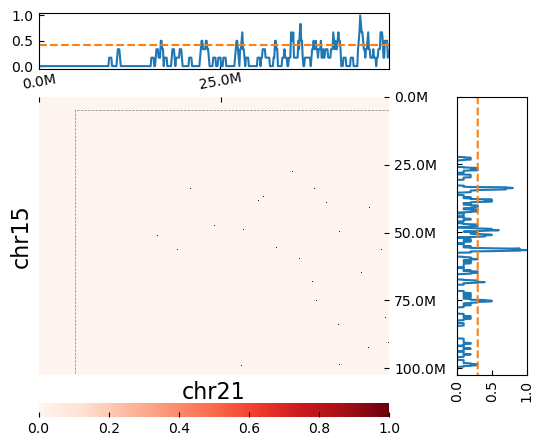

In [1]:
from HiSTra.BoxFinder import *
from HiSTra.SparseMatrixDeal import *
path = "/media/sdd_14T/translocation/scTL_out/Matrix_aligned/"
sample_name = "2017_NM_sci-Hi-C_K562_100"
sv_result_sort_path = "/media/sdd_14T/translocation/scTL_out/SV_result/2017_NM_sci-Hi-C_K562_100/2017_NM_sci-Hi-C_K562_100_result_500k_sorted.csv"
sv_result_sort = pd.read_csv(sv_result_sort_path)
result_pick_len = 19
sizes_path = "/media/sdd_14T/sizes/chrom_hg19_noM_noY.sizes"
sizes = pd.read_csv(sizes_path,sep='\t',header=None)
TLplotandBEDproduce(path,sample_name,sv_result_sort[0:result_pick_len],sizes,False)